# **Análise Estatística: Salário de Profissionais de Dados**

## **Importação e Exploração Inicial da Base**

In [23]:
#Importação de bibliotecas e do arquivo a ser analisado

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("salario_profissionais_dados.csv")

In [24]:
#Exploração das primeiras linhas com .head()

df.head(5)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [25]:
#Verificação dos tipos de dados e nome das colunas com .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [26]:
#Verificação da quantidade de linhas e colunas com .shape ---> (linhas, colunas)

df.shape

(3755, 10)

In [27]:
#Verificação de dados ausentes com .isnull().sum()

df.isnull().sum()

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

## **Frequência e Distribuição das Categorias**

In [28]:
#Verificação do Top10 cargos mais comuns com .value_counts().head(10)

(df['job_title'].value_counts(normalize=True).head(10) * 100).round(2)

job_title
Data Engineer                27.70
Data Scientist               22.37
Data Analyst                 16.30
Machine Learning Engineer     7.70
Analytics Engineer            2.74
Data Architect                2.69
Research Scientist            2.18
Applied Scientist             1.54
Data Science Manager          1.54
Research Engineer             0.99
Name: proportion, dtype: float64

In [29]:
#Verificação do Nível de experiência com .value_counts().head(10)

(df['experience_level'].value_counts(normalize=True).head(10) * 100).round(2)

experience_level
SE    67.00
MI    21.44
EN     8.52
EX     3.04
Name: proportion, dtype: float64

In [30]:
#Verificação do tamanho das empresae com .value_counts().head(10)

(df['company_size'].value_counts(normalize=True).head(10) * 100).round(2)

company_size
M    83.97
L    12.09
S     3.94
Name: proportion, dtype: float64

## **Estatísticas Descritivas**

In [35]:
#Análise das medidas de tendência central: média, mediana

media = round(df['salary_in_usd'].mean(), 2)

mediana = round(df['salary_in_usd'].median(), 2)

print(f"A média dos sálarios é {media} dólares.") 
print(f"E a mediana dos sálarios é {mediana} dólares.")

A média dos sálarios é 137570.39 dólares.
E a mediana dos sálarios é 135000.0 dólares.


In [36]:
#Análise das medidas de dispersão: desvio padrão, mínimo e máximo

minimo = round(df['salary_in_usd'].min(), 2)

maximo = round(df['salary_in_usd'].max(), 2)

desv_pad = round(df['salary_in_usd'].std(), 2)

print(f"O valor mínimo dos sálarios é {minimo} dólares.") 
print(f"O valor máximo dos sálarios é {maximo} dólares.")
print(f"O valor do desvio-padrão dos sálarios é {desv_pad} dólares.")

O valor mínimo dos sálarios é 5132 dólares.
O valor máximo dos sálarios é 450000 dólares.
O valor do desvio-padrão dos sálarios é 63055.63 dólares.


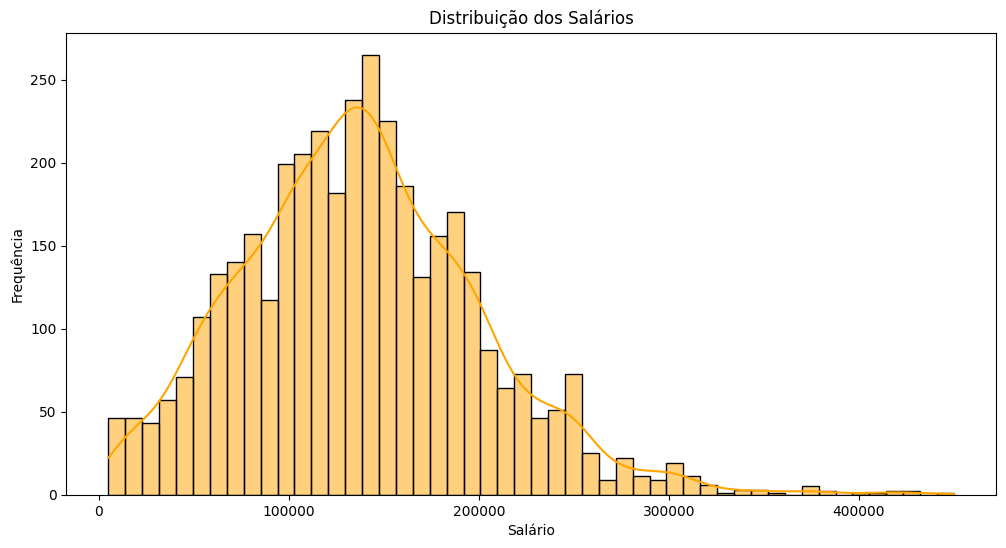

In [41]:
#Distribuição geral: através de histogramas

plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='orange')
plt.title('Distribuição dos Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

C:\Users\Yuri\AppData\Local\Temp\ipykernel_41004\2246848276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='pastel')


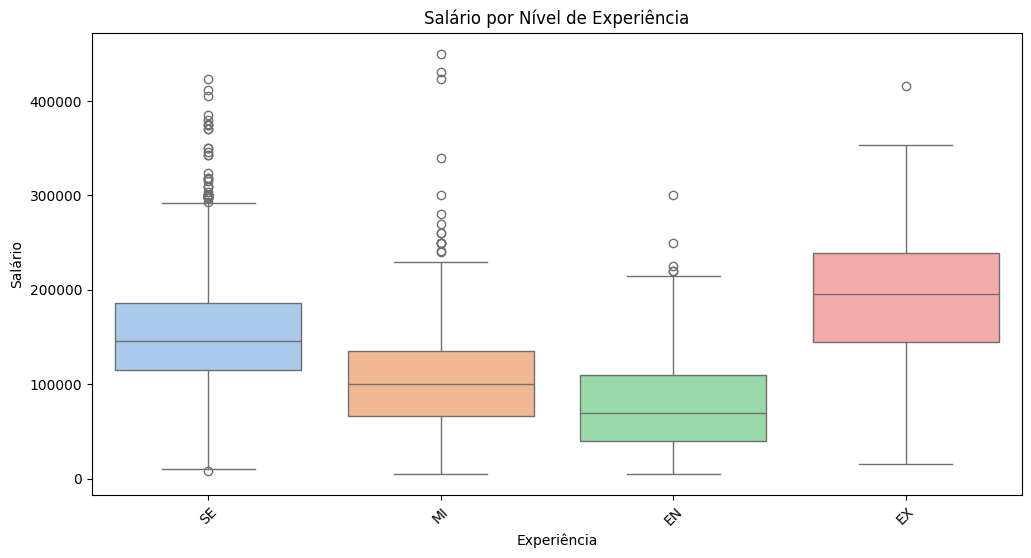

In [42]:
#Comparações por grupos: especialmente por nível de experiência (usando boxplots)

plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='pastel')
plt.title('Salário por Nível de Experiência')
plt.xlabel('Experiência')
plt.ylabel('Salário')
plt.xticks(rotation=45)
plt.show()

## **Comparações por País**

In [47]:
#Verificar os 10 países com as maiores médias salariais

top10_paises = (df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False).head(10).round(2))

print(f"A média salarial dos top 10 países são (em dólares): \n{top10_paises}")

A média salarial dos top 10 países são (em dólares): 
country
Israel                      423834.00
Malaysia                    200000.00
Puerto Rico                 166000.00
United States of America    152822.01
Canada                      132222.91
China                       125404.00
New Zealand                 125000.00
Bosnia and Herzegovina      120000.00
Ireland                     114943.43
Dominican Republic          110000.00
Name: salary_in_usd, dtype: float64


## **Correlações e Tendências**

                     salary_in_usd  work_year  years_of_experience
salary_in_usd                 1.00       0.23                 0.41
work_year                     0.23       1.00                 0.18
years_of_experience           0.41       0.18                 1.00


Coeficiente Interpretação:
1.00 - Correlação perfeita positiva
0.70 a 0.99 - Correlação forte positiva
0.30 a 0.69 - Correlação moderada positiva
0.01 a 0.29 - Correlação fraca positiva
0 - Sem correlação


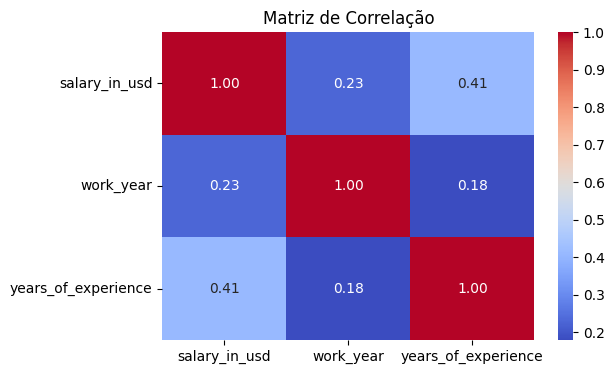

In [ ]:
#Existe alguma tendência de aumento salarial com os anos? Quanto maior o tempo de experiência, maior o salário?

# Seleção das colunas quantitativas relevantes
colunas_relevantes = ['salary_in_usd', 'work_year', 'years_of_experience']

# Gerar matriz de correlação
matriz_corr = df[colunas_relevantes].corr()

# Exibir com duas casas decimais
print(matriz_corr.round(2))

print("\n\nCoeficiente Interpretação:\n1.00 - Correlação perfeita positiva\n0.70 a 0.99 - Correlação forte positiva\n0.30 a 0.69 - Correlação moderada positiva\n0.01 a 0.29 - Correlação fraca positiva\n0 - Sem correlação")

#Visualizar com mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()